In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


The data set contains information about population, income, household, location, and houses in districts. The house information provides age of the home, and the amount total rooms/bedrooms. The median house value is the target variable. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20000 non-null  int64  
 1   longitude           20000 non-null  float64
 2   latitude            20000 non-null  float64
 3   housing_median_age  20000 non-null  float64
 4   total_rooms         20000 non-null  float64
 5   total_bedrooms      20000 non-null  float64
 6   population          20000 non-null  float64
 7   households          20000 non-null  float64
 8   median_income       20000 non-null  float64
 9   median_house_value  20000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


In [5]:
from sklearn.model_selection import train_test_split 

In [6]:
del df["Unnamed: 0"]  # Deleted the column that has no values 

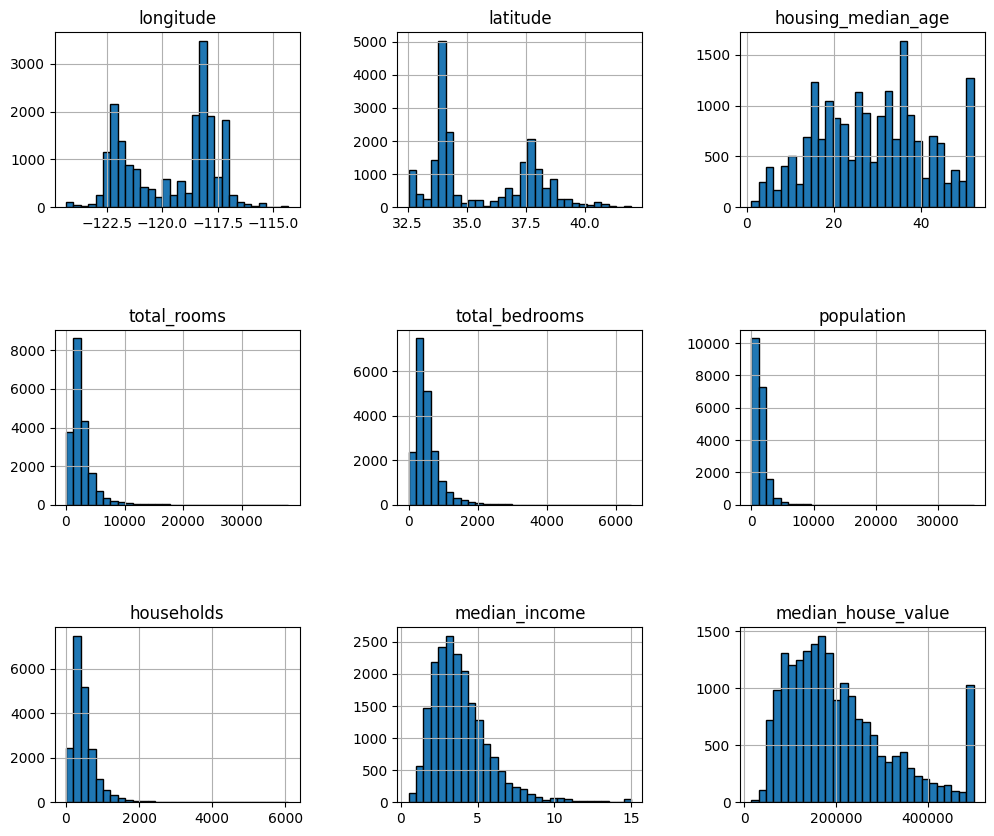

In [7]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

**Step 2: Indentify Feature and Response Variable**

In [8]:
features_of_interest = ['total_bedrooms', 'total_rooms', 'households']
X = df[features_of_interest]
Y = df['median_house_value']  # response or targeet variable 

**Step 3: Prepare test and train data **

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0) 

In [10]:
from sklearn.linear_model import LinearRegression    
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [11]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.06307728977500482


In [12]:
print('The intercept (b_0) is {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is {}'.format(my_linear_regression.coef_[0]))
print('The coef (b_2) is {}'.format(my_linear_regression.coef_[1])) 

The intercept (b_0) is 196296.27046932856
The coef (b_1) is -225.40584648563504
The coef (b_2) is 33.62212128350685


y= 197498.84 - 148.68x1 + 33.80x2

In [13]:
median_house_value_pred = my_linear_regression.predict(X_test)
median_house_value_pred


array([208235.639547  , 196812.08121412, 240197.83400718, ...,
       226946.38397329, 194080.22973001, 245266.41074113])

In [14]:
from sklearn import metrics
print('Mean Absoulte Error:', metrics.mean_absolute_error(Y_test, median_house_value_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, median_house_value_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, median_house_value_pred)))

Mean Absoulte Error: 87082.15607081563
Mean Squared Error: 12380022557.654697
Root Mean Squared Error: 111265.54973420432


In [15]:
def MAPE(Y, pred):
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er) 

In [16]:
print('MAPE:', MAPE(Y_test, median_house_value_pred)*100, "%")

MAPE: 58.811205296434174 %


**Step 5: Test and Evaluate the model**

In [17]:
pred = my_linear_regression.predict(X_test)     # see the predictions, use predict code for predictions, the X_test is the values being used 
pred

array([208235.639547  , 196812.08121412, 240197.83400718, ...,
       226946.38397329, 194080.22973001, 245266.41074113])

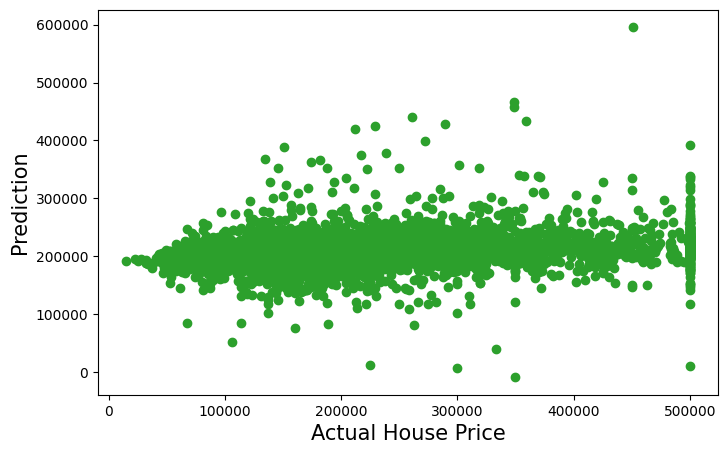

In [18]:
plt.figure(figsize = (8, 5)) 
plt.scatter(x = Y_test, y = pred, color = 'Tab:green') 
plt.xlabel('Actual House Price', fontsize = 15) 
plt.ylabel('Prediction', fontsize = 15)
plt.show()

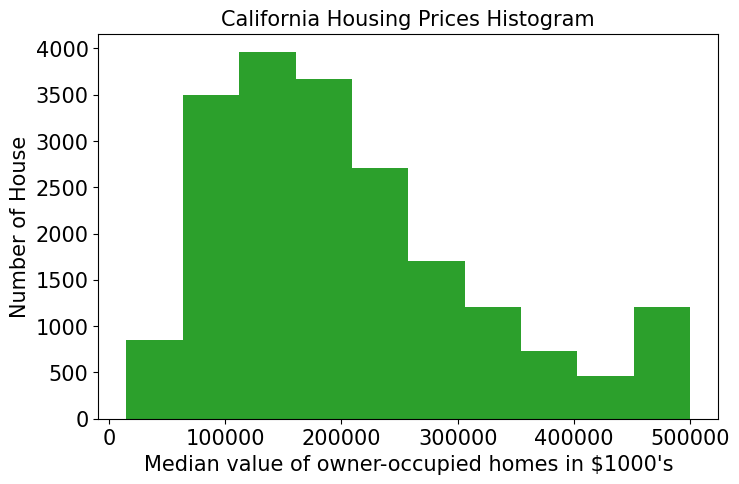

In [19]:
import matplotlib.pyplot as plt    # to create a histogram, first call the matplotlib library 
plt.figure(figsize = (8, 5))
plt.hist(df['median_house_value'], color = 'Tab:green')
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median value of owner-occupied homes in $1000\'s', fontsize = 15)
plt.xticks(fontsize = 15)  # define the font size of the numbers of the axis 
plt.yticks(fontsize = 15)
plt.ylabel('Number of House', fontsize = 15)
plt.show()

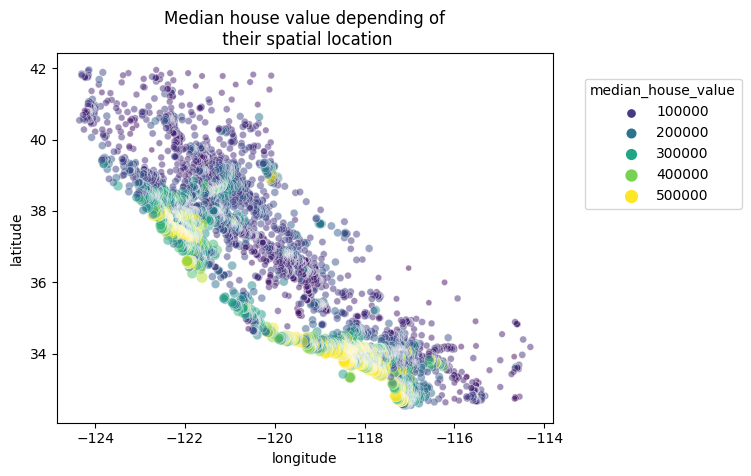

In [20]:
import seaborn as sns

sns.scatterplot(data=df, x="longitude", y="latitude",
                size="median_house_value", hue="median_house_value",
                palette="viridis", alpha=0.5)
plt.legend(title="median_house_value", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [31]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(df.shape[0]), size=500,
                     replace=False)

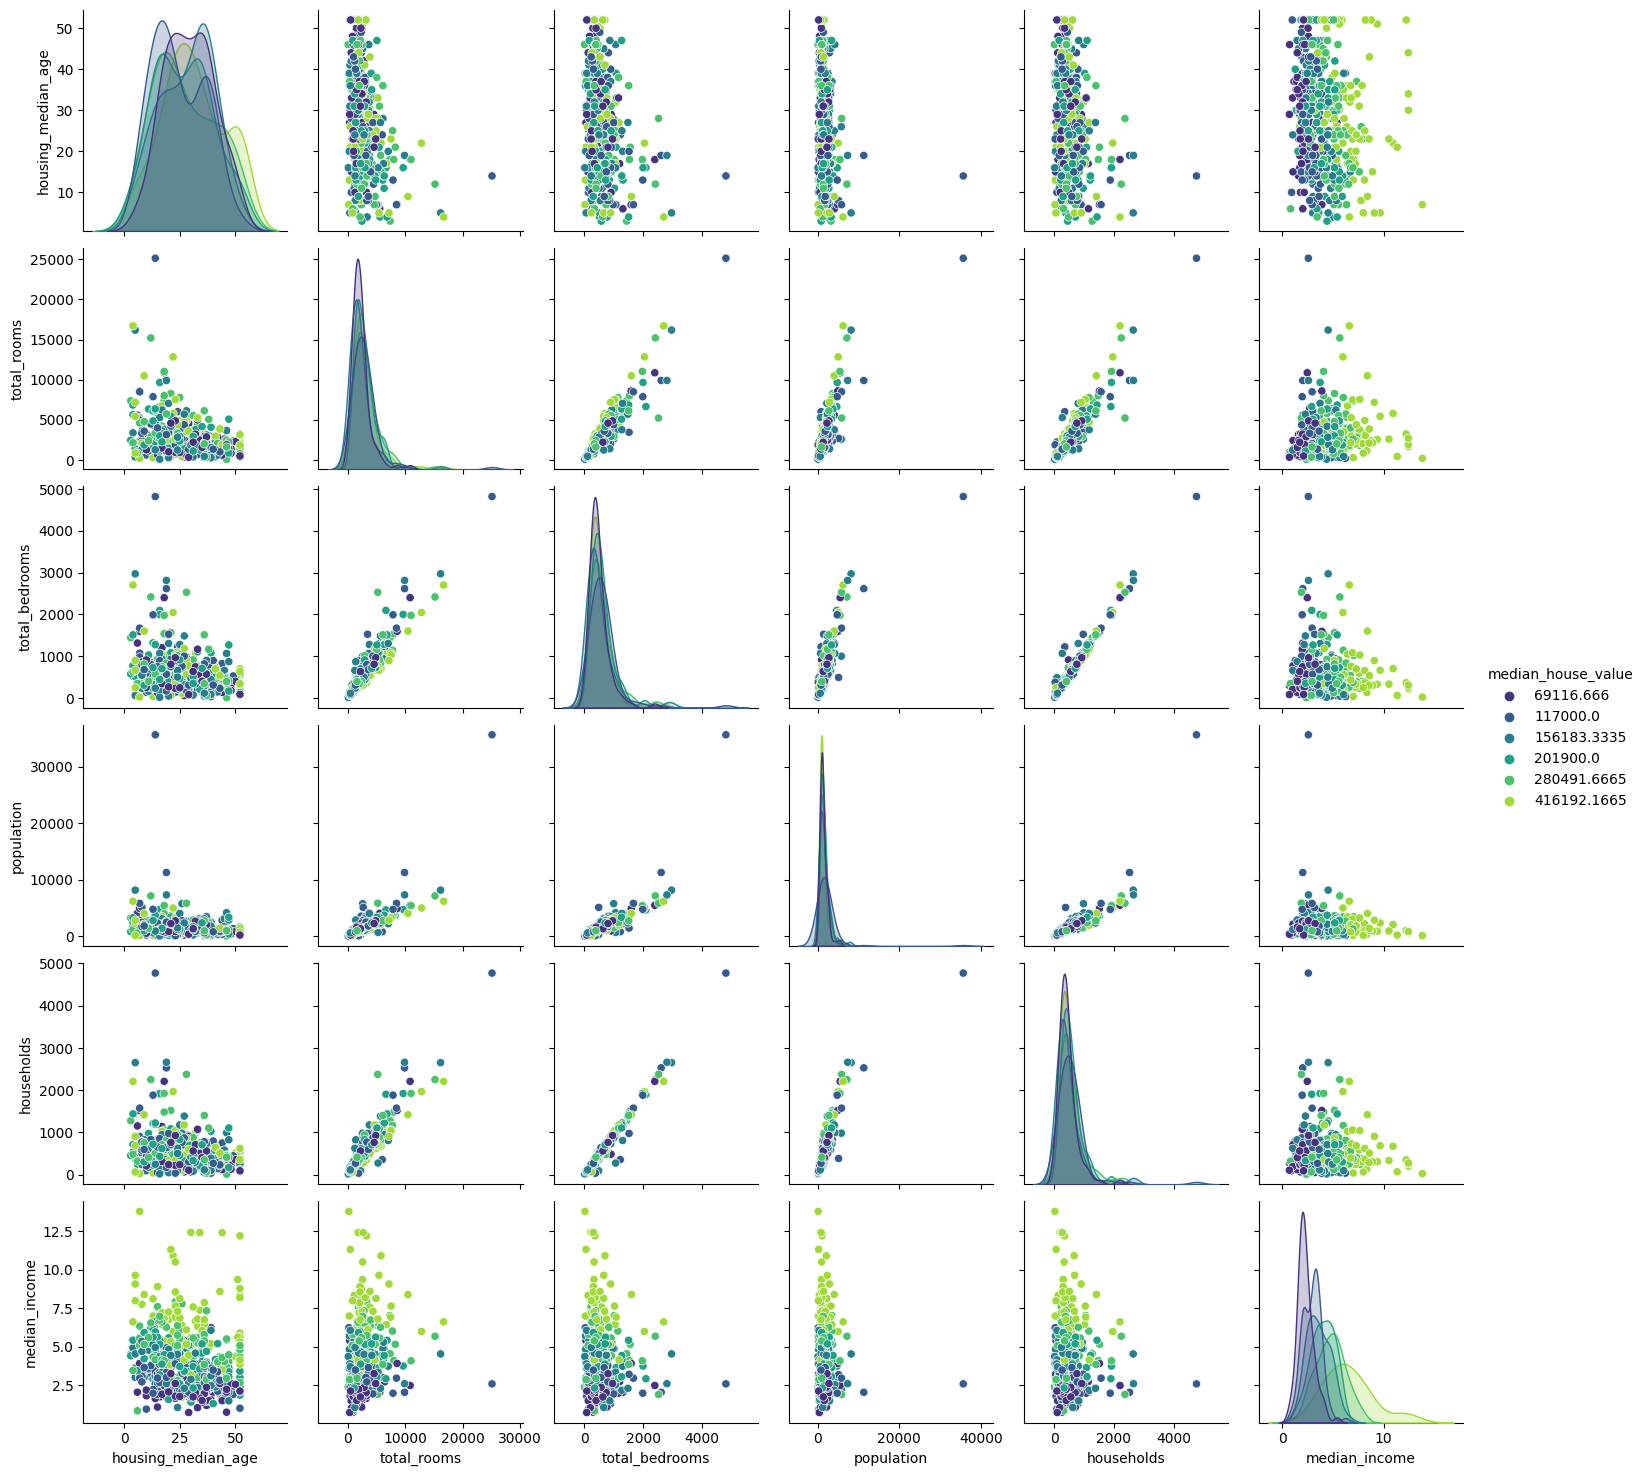

In [33]:
columns_drop = ["longitude", "latitude"]
subset = df.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["median_house_value"] = pd.qcut(subset["median_house_value"], 6, retbins=False)
subset["median_house_value"] = subset["median_house_value"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="median_house_value", palette="viridis")